In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pandas_profiling as pf

C:\Users\CAIA117\Anaconda\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\CAIA117\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\CAIA117\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\CAIA117\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\CAIA117\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\CAIA117\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  

In [17]:

import warnings
warnings.filterwarnings('ignore')

In [18]:
#Reading the dataset
df=pd.read_excel(r'C:\Users\CAIA117\Desktop\data.xlsx')

In [19]:
#No of Rows and Columns
df.shape

(3047, 34)

In [20]:
#Cheacking the Null Percentage in each Features
df.isnull().sum()/len(df)

avgAnnCount                0.000000
avgDeathsPerYear           0.000000
deathRate                  0.000000
incidenceRate              0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
binnedInc                  0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
Geography                  0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctSomeCol18_24            0.749918
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         0.049885
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.199869
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0

In [21]:
#Features Which Holds Null Values
#--->PctSomeCol18_24 74.99%
#--->PctEmployed16_Over 4.98%
#--->PctPrivateCoverageAlone 19.98%

In [22]:
#Get to Know the Datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
deathRate                  3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

In [23]:
#Features Datatypes
    #OBJECT 
        #binnedInc                  
        #Geography 
    #INTEGER
        #avgDeathsPerYear  
        #medIncome                 
        #popEst2015  
    #Float
       #avgAnnCount                
       #deathRate                  
       #incidenceRate              
       #povertyPercent             
       #studyPerCap                
       #MedianAge                  
       #MedianAgeMale              
       #MedianAgeFemale            
       #AvgHouseholdSize           
       #PercentMarried             
       #PctNoHS18_24               
       #PctHS18_24                 
       #PctSomeCol18_24            
       #PctBachDeg18_24            
       #PctHS25_Over               
       #PctBachDeg25_Over          
       #PctEmployed16_Over         
       #PctUnemployed16_Over       
       #PctPrivateCoverage         
       #PctPrivateCoverageAlone    
       #PctEmpPrivCoverage         
       #PctPublicCoverage          
       #PctPublicCoverageAlone     
       #PctWhite                   
       #PctBlack                   
       #PctAsian                   
       #PctOtherRace               
       #PctMarriedHouseholds       
       #BirthRate                  

In [24]:
#Get to know how the data is represented
df.head()

,avgAnnCount,avgDeathsPerYear,deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [25]:
#Removing the features which holds more than 70% of Null Values
df=df.drop('PctSomeCol18_24',axis=1)

In [26]:
df.shape

(3047, 33)

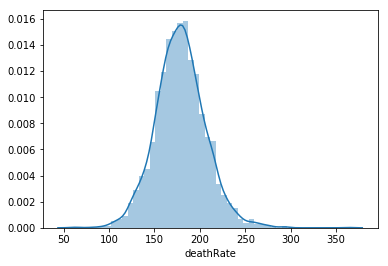

In [27]:
#Seeing the distribution of Features which Holds Null Values
sns.distplot(df['deathRate'])
plt.show()

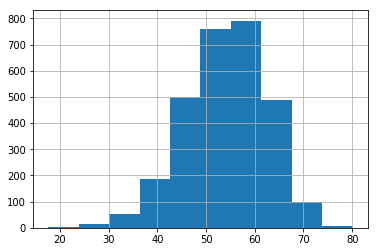

In [28]:
df['PctEmployed16_Over'].hist()
plt.show()

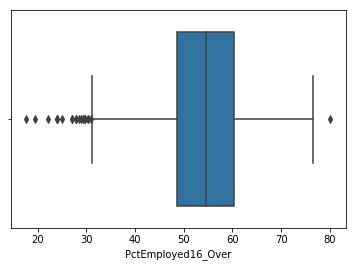

In [29]:
sns.boxplot(df['PctEmployed16_Over'])
plt.show()

In [30]:
print(df['PctEmployed16_Over'].mean())
print(df['PctEmployed16_Over'].median())

54.15264248704645
54.5


In [31]:
#Replacing Null Values with 'Median' in 'PctEmployed16_Over'
df['PctEmployed16_Over']=df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].median())

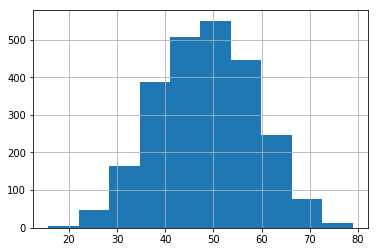

In [32]:
df['PctPrivateCoverageAlone'].hist()
plt.show()

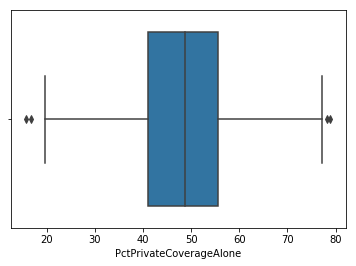

In [33]:
sns.boxplot(df['PctPrivateCoverageAlone'])
plt.show()

In [34]:
print(df['PctPrivateCoverageAlone'].mean())
print(df['PctPrivateCoverageAlone'].median())

48.45377358490559
48.7


In [35]:
#Replacing Null Values with 'Mean' in 'PctPrivateCoverageAlone'
df['PctPrivateCoverageAlone']=df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].mean())

In [36]:
df.describe()

,avgAnnCount,avgDeathsPerYear,deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,9.018885,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,43.100000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.453774,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,53.800000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [37]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [38]:
#binnedinc
import statistics as s
df["binnedInc"].value_counts()
a=[42724.4, 45201]
b=[22640, 34218.1]
c=[34218.1, 37413.8]
d=[48021.6, 51046.4]
e=[45201, 48021.6]
f=[37413.8, 40362.7]
g=[51046.4, 54545.6]
h=[61494.5, 125635]
i=[40362.7, 42724.4]
j=[54545.6, 61494.5]
binnedinc={"(42724.4, 45201]":s.mean(a),
            "[22640, 34218.1]":s.mean(b),
            "(34218.1, 37413.8]":s.mean(c),
            "(48021.6, 51046.4]":s.mean(d),
            "(45201, 48021.6]":s.mean(e),
            "(37413.8, 40362.7]":s.mean(f),
            "(51046.4, 54545.6]":s.mean(g),
            "(61494.5, 125635]":s.mean(h),
            "(40362.7, 42724.4]":s.mean(i),
            "(54545.6, 61494.5]":s.mean(j)}


df.replace(binnedinc, inplace=True)
df.head()
df["binnedInc"]

0       93564.75
1       49534.00
2       49534.00
3       43962.70
4       49534.00
5       52796.00
6       38888.25
7       38888.25
8       41543.55
9       58020.05
10      58020.05
11      52796.00
12      52796.00
13      93564.75
14      49534.00
15      43962.70
16      93564.75
17      49534.00
18      49534.00
19      52796.00
20      41543.55
21      43962.70
22      35815.95
23      58020.05
24      38888.25
25      28429.05
26      43962.70
27      35815.95
28      28429.05
29      28429.05
          ...   
3017    49534.00
3018    38888.25
3019    46611.30
3020    43962.70
3021    52796.00
3022    46611.30
3023    38888.25
3024    46611.30
3025    58020.05
3026    46611.30
3027    38888.25
3028    41543.55
3029    46611.30
3030    52796.00
3031    41543.55
3032    58020.05
3033    46611.30
3034    43962.70
3035    41543.55
3036    46611.30
3037    46611.30
3038    49534.00
3039    49534.00
3040    35815.95
3041    49534.00
3042    46611.30
3043    49534.00
3044    52796.

In [39]:
new = df["Geography"].str.split(",", n = 1, expand = True)

In [40]:
df["county"]= new[0]

In [41]:
df["state"]= new[1]

In [42]:
df.drop("Geography",axis = 1, inplace = True)

In [43]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'county', 'state'],
      dtype='object')

In [44]:
df['state']

0           Washington
1           Washington
2           Washington
3           Washington
4           Washington
5           Washington
6           Washington
7           Washington
8           Washington
9           Washington
10          Washington
11          Washington
12          Washington
13          Washington
14          Washington
15          Washington
16          Washington
17          Washington
18          Washington
19          Washington
20          Washington
21          Washington
22       West Virginia
23       West Virginia
24       West Virginia
25       West Virginia
26       West Virginia
27       West Virginia
28       West Virginia
29       West Virginia
             ...      
3017              Iowa
3018            Kansas
3019            Kansas
3020            Kansas
3021            Kansas
3022            Kansas
3023            Kansas
3024            Kansas
3025            Kansas
3026            Kansas
3027            Kansas
3028            Kansas
3029       

In [45]:
df.shape

(3047, 34)

In [46]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'county', 'state'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
deathRate                  3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null float64
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctBachDeg18_24            3047 non-null float64
PctHS25_Over               3047 non-null float64
PctBachDeg25_Over

In [48]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', 'county', 'state'],
      dtype='object')

In [49]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['state']= le.fit_transform(df['state'])

df['state']=df['state'].values.reshape(-1,1)


In [50]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['county']= le.fit_transform(df['county'])

df['county']=df['county'].values.reshape(-1,1)

In [51]:
df['county'].value_counts()

1720    30
811     25
578     23
950     23
805     21
988     19
340     18
1097    18
1663    17
1006    17
1092    17
1730    16
662     14
1713    14
262     13
650     13
5       12
489     12
825     12
933     12
1010    12
903     12
926     11
1463    11
1295    11
558     11
1105    11
337     11
239     11
695     10
        ..
549      1
551      1
555      1
557      1
501      1
495      1
435      1
493      1
437      1
439      1
443      1
445      1
447      1
451      1
453      1
455      1
457      1
461      1
463      1
467      1
469      1
471      1
473      1
475      1
477      1
479      1
483      1
485      1
491      1
0        1
Name: county, Length: 1819, dtype: int64

In [52]:
df['state'].value_counts()

43    233
10    155
46    125
17    120
25    115
16    102
13    102
33     99
15     99
42     95
14     92
35     87
23     87
22     83
24     82
27     80
36     77
3      75
49     72
38     67
9      66
18     64
0      63
32     62
5      60
41     59
4      57
48     55
34     51
26     48
40     46
12     42
47     39
37     36
31     32
44     27
20     24
50     23
30     21
1      18
28     17
19     16
2      15
45     14
21     14
29     10
6       8
39      5
11      4
7       3
8       1
Name: state, dtype: int64

In [53]:
#Scatter Plots between independent variable and target varaible
sns.regplot(x=df["avgAnnCount"], y=df["deathRate"])
corr, _ = pearsonr(df['avgAnnCount'], df['deathRate'])
print(corr)

-0.143531619689


In [71]:
corr, _ = pearsonr(df['avgAnnCount'], df['avgDeathsPerYear'])
print(corr)

0.9394077833


In [72]:
sns.regplot(x=df["avgDeathsPerYear"], y=df["deathRate"])
corr, _ = pearsonr(df['avgDeathsPerYear'], df['deathRate'])
print(corr)

-0.0907151599892


In [109]:
corr, _ = pearsonr(df['avgDeathsPerYear'], df['popEst2015'])
print(corr)

0.9776340555232121


In [74]:
sns.regplot(x=df["popEst2015"], y=df["deathRate"])
corr, _ = pearsonr(df['popEst2015'], df['deathRate'])
print(corr)

-0.120073095736


In [75]:
corr, _ = pearsonr(df['popEst2015'], df['avgAnnCount'])
print(corr)

0.926893537917


In [76]:
sns.regplot(x=df["PctAsian"], y=df["deathRate"])
corr, _ = pearsonr(df['PctAsian'], df['deathRate'])
print(corr)

-0.186331104522


In [77]:
sns.regplot(x=df["PctOtherRace"], y=df["deathRate"])
corr, _ = pearsonr(df['PctOtherRace'], df['deathRate'])
print(corr)

-0.189893571076


In [78]:
 corr, _ = pearsonr(df['PctOtherRace'], df['PctAsian'])
print(corr)

0.200781102564


In [79]:
sns.regplot(x=df["PctPrivateCoverage"], y=df["deathRate"])
corr, _ = pearsonr(df['PctPrivateCoverage'], df['deathRate'])
print(corr)

-0.386065506754


In [80]:
corr, _ = pearsonr(df['PctPrivateCoverageAlone'], df['PctPrivateCoverage'])
print(corr)

0.834902731282


In [81]:
 sns.regplot(x=df["PctPrivateCoverageAlone"], y=df["deathRate"])
corr, _ = pearsonr(df['PctPrivateCoverageAlone'], df['deathRate'])
print(corr)

-0.32606720701


In [82]:
corr, _ = pearsonr(df['PctPrivateCoverageAlone'], df['PctEmpPrivCoverage'])
print(corr)

0.831722875695


In [83]:
sns.regplot(x=df["PctEmpPrivCoverage"], y=df["deathRate"])
corr, _ = pearsonr(df['PctEmpPrivCoverage'], df['deathRate'])
print(corr)

-0.26739942816


In [84]:
corr, _ = pearsonr(df['PctPrivateCoverage'], df['PctEmpPrivCoverage'])
print(corr)

0.827458844255


In [85]:
sns.regplot(x=df["medIncome"], y=df["deathRate"])
corr, _ = pearsonr(df['medIncome'], df['deathRate'])
print(corr)

-0.428614927071


In [86]:
sns.regplot(x=df["PercentMarried"], y=df["deathRate"])
corr, _ = pearsonr(df['PercentMarried'], df['deathRate'])
print(corr)

-0.266820463554


In [87]:
sns.regplot(x=df["PctBachDeg18_24"], y=df["deathRate"])
corr, _ = pearsonr(df['PctBachDeg18_24'], df['deathRate'])
print(corr)

-0.287817410167


In [88]:
sns.regplot(x=df["PctBachDeg25_Over"], y=df["deathRate"])
corr, _ = pearsonr(df['PctBachDeg25_Over'], df['deathRate'])
print(corr)

-0.485477318088


In [89]:
sns.regplot(x=df["PctEmployed16_Over"], y=df["deathRate"])
corr, _ = pearsonr(df['PctEmployed16_Over'], df['deathRate'])
print(corr)

-0.397432540786


In [90]:
sns.regplot(x=df["PctWhite"], y=df["deathRate"])   
corr, _ = pearsonr(df['PctWhite'], df['deathRate'])
print(corr)

-0.177399980275


In [91]:
sns.regplot(x=df["PctMarriedHouseholds"], y=df["deathRate"])
corr, _ = pearsonr(df['PctMarriedHouseholds'], df['deathRate'])
print(corr)

-0.29332534051


In [92]:
sns.regplot(x=df["BirthRate"], y=df["deathRate"])
corr, _ = pearsonr(df['BirthRate'], df['deathRate'])
print(corr)

-0.0874069698407


In [93]:
sns.regplot(x=df["studyPerCap"], y=df["deathRate"])
corr, _ = pearsonr(df['studyPerCap'], df['deathRate'])
print(corr)

-0.0222850107724


In [94]:
sns.regplot(x=df["AvgHouseholdSize"], y=df["deathRate"])
corr, _ = pearsonr(df['AvgHouseholdSize'], df['deathRate'])
print(corr)

-0.0369053138102


In [95]:
sns.regplot(x=df["MedianAgeMale"], y=df["deathRate"])
corr, _ = pearsonr(df['MedianAgeMale'], df['deathRate'])
print(corr)

-0.0219294290766


In [96]:
sns.regplot(x=df["MedianAgeFemale"], y=df["deathRate"])
corr, _ = pearsonr(df['MedianAgeFemale'], df['deathRate'])
print(corr)

0.012048385965


In [97]:
sns.regplot(x=df["MedianAge"], y=df["deathRate"])
corr, _ = pearsonr(df['MedianAge'], df['deathRate'])
print(corr)

0.00437507718124


In [98]:
sns.regplot(x=df["incidenceRate"], y=df["deathRate"])
corr, _ = pearsonr(df['incidenceRate'], df['deathRate'])
print(corr)

0.449431697561


In [99]:
sns.regplot(x=df["povertyPercent"], y=df["deathRate"])
corr, _ = pearsonr(df['povertyPercent'], df['deathRate'])
print(corr)

0.429388980256


In [100]:
sns.regplot(x=df["PctNoHS18_24"], y=df["deathRate"])
corr, _ = pearsonr(df['PctNoHS18_24'], df['deathRate'])
print(corr)

0.0884626100422


In [101]:
sns.regplot(x=df["PctHS18_24"], y=df["deathRate"])
corr, _ = pearsonr(df['PctHS18_24'], df['deathRate'])
print(corr)

0.261975940286


In [102]:
sns.regplot(x=df["PctHS25_Over"], y=df["deathRate"])
corr, _ = pearsonr(df['PctHS25_Over'], df['deathRate'])
print(corr)

0.404589075781


In [103]:
sns.regplot(x=df["PctUnemployed16_Over"], y=df["deathRate"])
corr, _ = pearsonr(df['PctUnemployed16_Over'], df['deathRate'])
print(corr)

0.378412442139


In [104]:
sns.regplot(x=df["PctPublicCoverage"], y=df["deathRate"])
corr, _ = pearsonr(df['PctPublicCoverage'], df['deathRate'])
print(corr)

0.404571656293


In [105]:
sns.regplot(x=df["PctPublicCoverageAlone"], y=df["deathRate"])
corr, _ = pearsonr(df['PctPublicCoverageAlone'], df['deathRate'])
print(corr)

0.449357575785


In [106]:
sns.regplot(x=df["PctBlack"], y=df["deathRate"])
corr, _ = pearsonr(df['PctBlack'], df['deathRate'])
print(corr)

0.257023560464


In [42]:
sns.regplot(x=df["county"], y=df["deathRate"])
corr, _ = pearsonr(df['county'], df['deathRate'])
print(corr)

0.0112243435812


In [114]:
sns.regplot(x=df["state"], y=df["deathRate"])
corr, _ = pearsonr(df['state'], df['deathRate'])
print(corr)

-0.0364102104066


In [115]:
sns.regplot(x=df["binnedInc"], y=df["deathRate"])
corr, _ = pearsonr(df['binnedInc'], df['deathRate'])
print(corr)

-0.388214315227


In [54]:
#Calculation Correlation between two variable using 'PearsonCoeff' From Scipy
corr, _ = pearsonr(df['avgAnnCount'], df['avgDeathsPerYear'])
print(corr)

0.9394077833


In [55]:
#Calculating Corelation between two variable using 'Numpy corrcoef' From Numpy
np.corrcoef(df['avgAnnCount'], df['avgDeathsPerYear'])

array([[ 1.        ,  0.93940778],
       [ 0.93940778,  1.        ]])

In [56]:
df.corr()

,avgAnnCount,avgDeathsPerYear,deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,county,state
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,0.247290,-0.024098,...,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508,0.023756,-0.099564
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,0.212261,-0.024599,...,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420,0.015182,-0.063447
deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,-0.388214,0.004375,...,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407,0.011224,-0.036410
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,-0.001913,0.018089,...,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181,0.036811,-0.076740
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,0.927743,-0.013288,...,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195,0.021858,0.051759
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,0.221787,-0.025219,...,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740,0.013290,-0.062310
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.716020,-0.029280,...,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283,-0.005920,-0.106105
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,0.029866,-0.026030,...,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676,-0.011057,-0.000279
binnedInc,0.247290,0.212261,-0.388214,-0.001913,0.927743,0.221787,-0.716020,0.029866,1.000000,-0.000729,...,-0.709133,-0.659317,0.130003,-0.229656,0.388126,0.077575,0.404488,-0.009863,0.029227,0.040891
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,-0.000729,1.000000,...,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276,-0.000402,0.013488


In [57]:
#Removing the Features which has very less correlation with the target variable: less than 0.1

In [58]:
#avgDeathsPerYear
df=df.drop('avgDeathsPerYear',axis=1)

In [59]:
#BirthRate
df=df.drop('BirthRate',axis=1)

In [60]:
#studyPerCap
df=df.drop('studyPerCap',axis=1)

In [61]:
#AvgHouseholdSize
df=df.drop('AvgHouseholdSize',axis=1)

In [57]:
#MedianAgeMale
df=df.drop('MedianAgeMale',axis=1)

In [58]:
#MedianAgeFemale
df=df.drop('MedianAgeFemale',axis=1)

In [59]:
#MedianAge
df=df.drop('MedianAge',axis=1)

In [60]:
#PctNoHS18_24
df=df.drop('PctNoHS18_24',axis=1)

In [63]:
df=df.drop('popEst2015',axis=1)

In [43]:
df=df.drop('state',axis=1)

In [44]:
df=df.drop('county',axis=1)

In [65]:
df=df.drop('medIncome',axis=1)

In [66]:
#Pandas Profiling
pf.ProfileReport(df)

Number of variables,22
Number of observations,3047
Total Missing (%),0.0%
Total size in memory,523.8 KiB
Average record size in memory,176.0 B
Numeric,22
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [67]:
df.shape

(3047, 22)

In [68]:
df.corr()

,avgAnnCount,deathRate,incidenceRate,povertyPercent,binnedInc,PercentMarried,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,...,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds
avgAnnCount,1.000000,-0.143532,0.073553,-0.135694,0.247290,-0.106108,-0.182054,0.284176,-0.311375,0.321021,...,0.132244,0.166674,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221
deathRate,-0.143532,1.000000,0.449432,0.429389,-0.388214,-0.266820,0.261976,-0.287817,0.404589,-0.485477,...,-0.386066,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325
incidenceRate,0.073553,0.449432,1.000000,0.009046,-0.001913,-0.119524,0.022644,0.046835,0.121725,-0.038177,...,0.105174,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176
povertyPercent,-0.135694,0.429389,0.009046,1.000000,-0.716020,-0.642857,0.094211,-0.387122,0.194361,-0.531600,...,-0.822534,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953
binnedInc,0.247290,-0.388214,-0.001913,-0.716020,1.000000,0.310695,-0.160975,0.436638,-0.454231,0.657815,...,0.653903,0.651386,0.690808,-0.709133,-0.659317,0.130003,-0.229656,0.388126,0.077575,0.404488
PercentMarried,-0.106108,-0.266820,-0.119524,-0.642857,0.310695,1.000000,0.132792,0.053037,0.102434,0.103585,...,0.449452,0.300249,0.232899,-0.246972,-0.459990,0.677420,-0.622357,-0.148691,-0.104669,0.870261
PctHS18_24,-0.182054,0.261976,0.022644,0.094211,-0.160975,0.132792,1.000000,-0.389334,0.438929,-0.404754,...,-0.253851,-0.260841,-0.244494,0.278220,0.234124,0.045306,-0.024868,-0.199770,-0.060415,0.120040
PctBachDeg18_24,0.284176,-0.287817,0.046835,-0.387122,0.436638,0.053037,-0.389334,1.000000,-0.384049,0.599814,...,0.487742,0.449912,0.450996,-0.422470,-0.421805,0.069133,-0.093614,0.345883,0.006547,-0.000104
PctHS25_Over,-0.311375,0.404589,0.121725,0.194361,-0.454231,0.102434,0.438929,-0.384049,1.000000,-0.740611,...,-0.221935,-0.274811,-0.222803,0.427974,0.297143,0.188045,-0.024445,-0.436561,-0.285611,0.062176
PctBachDeg25_Over,0.321021,-0.485477,-0.038177,-0.531600,0.657815,0.103585,-0.404754,0.599814,-0.740611,1.000000,...,0.603248,0.580386,0.539084,-0.636095,-0.605760,0.048652,-0.146409,0.437963,0.039075,0.098134


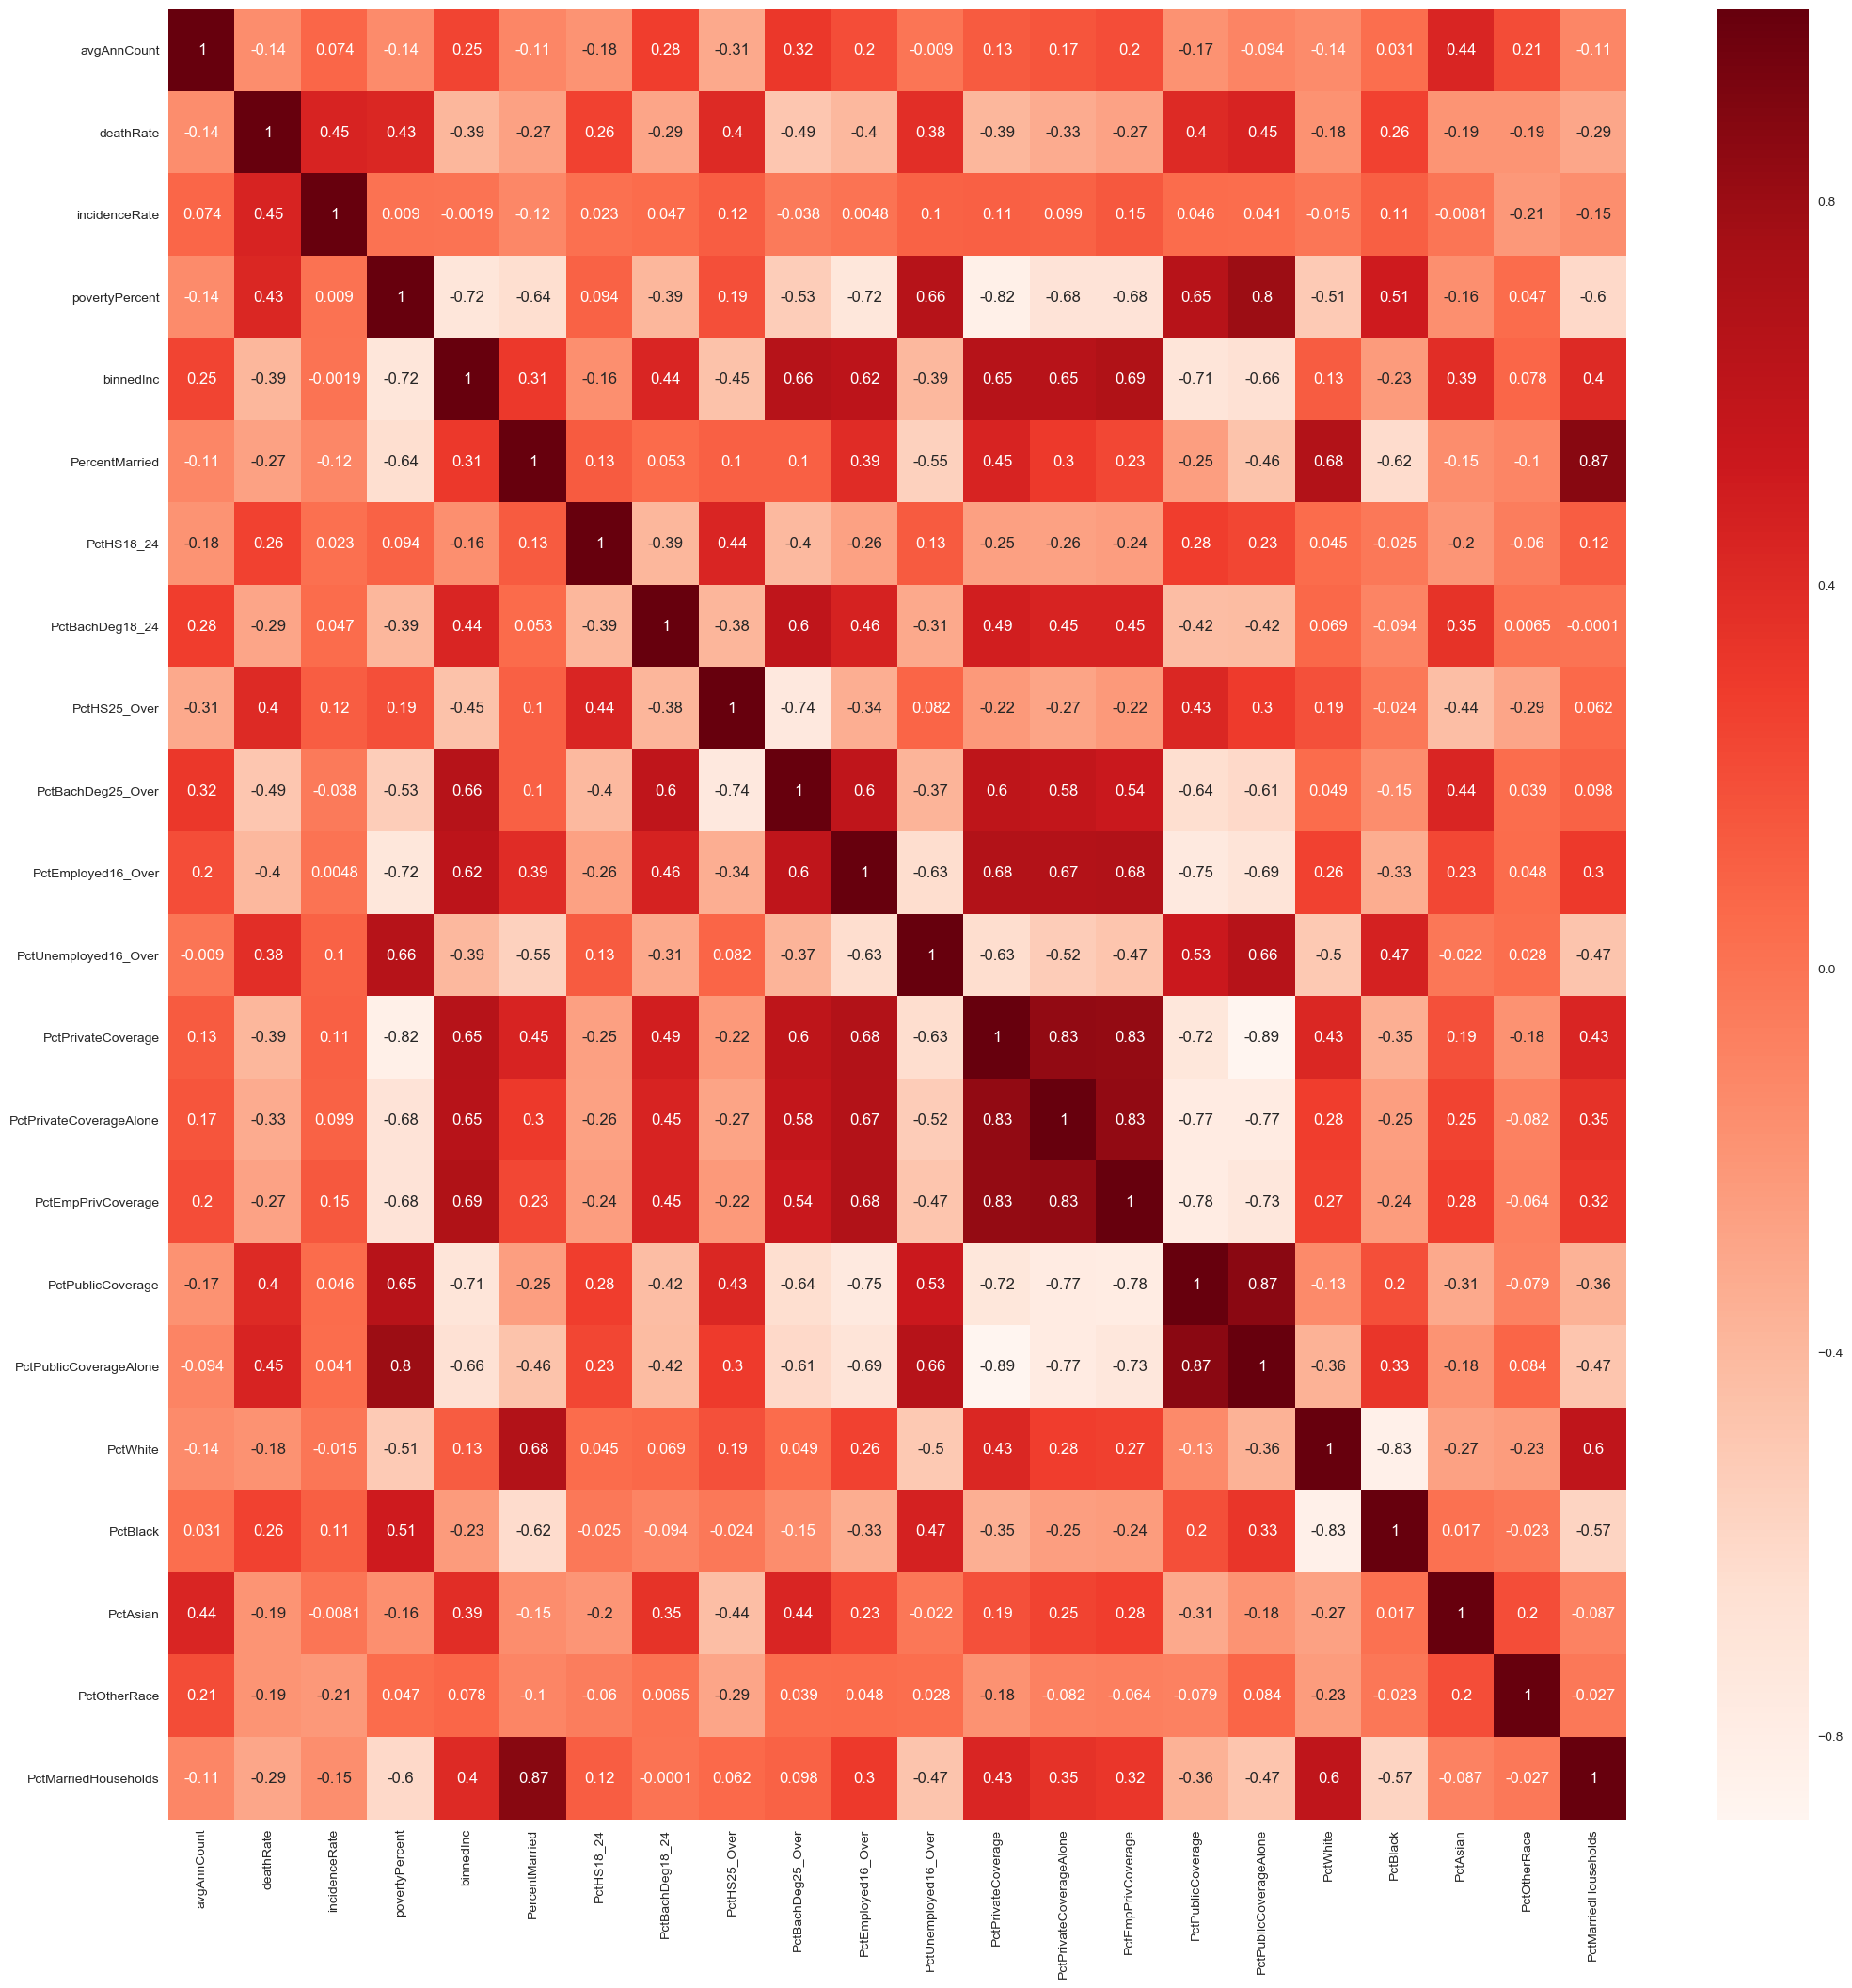

In [69]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()

In [62]:
#Removing the multi=collinearity Features
corr, _ = pearsonr(df['avgAnnCount'], df['popEst2015'])
print(corr)

0.926893537917


In [41]:
corr, _ = pearsonr(df['PctEmpPrivCoverage'], df['PctPrivateCoverageAlone'])
print(corr)

0.8317228756949839


In [42]:
corr, _ = pearsonr(df['PctPrivateCoverage'], df['PctPrivateCoverageAlone'])
print(corr)

0.8349027312816639


In [43]:
corr, _ = pearsonr(df['PctEmpPrivCoverage'], df['PctPrivateCoverage'])
print(corr)

0.827458844254509


In [46]:
#Till now we have only the features which has more than 90% correlation between the independene varaibles
df=df.drop('popEst2015',axis=1)

In [70]:
df.shape

(3047, 22)

In [71]:
df.columns

Index(['avgAnnCount', 'deathRate', 'incidenceRate', 'povertyPercent',
       'binnedInc', 'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds'],
      dtype='object')

In [72]:
#Spliting the Dependent and Independent Variables
Y=df['deathRate']
X=df.drop('deathRate',axis=1)

In [73]:
X.shape

(3047, 21)

In [74]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'povertyPercent', 'binnedInc',
       'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [75]:
Y.shape

(3047,)

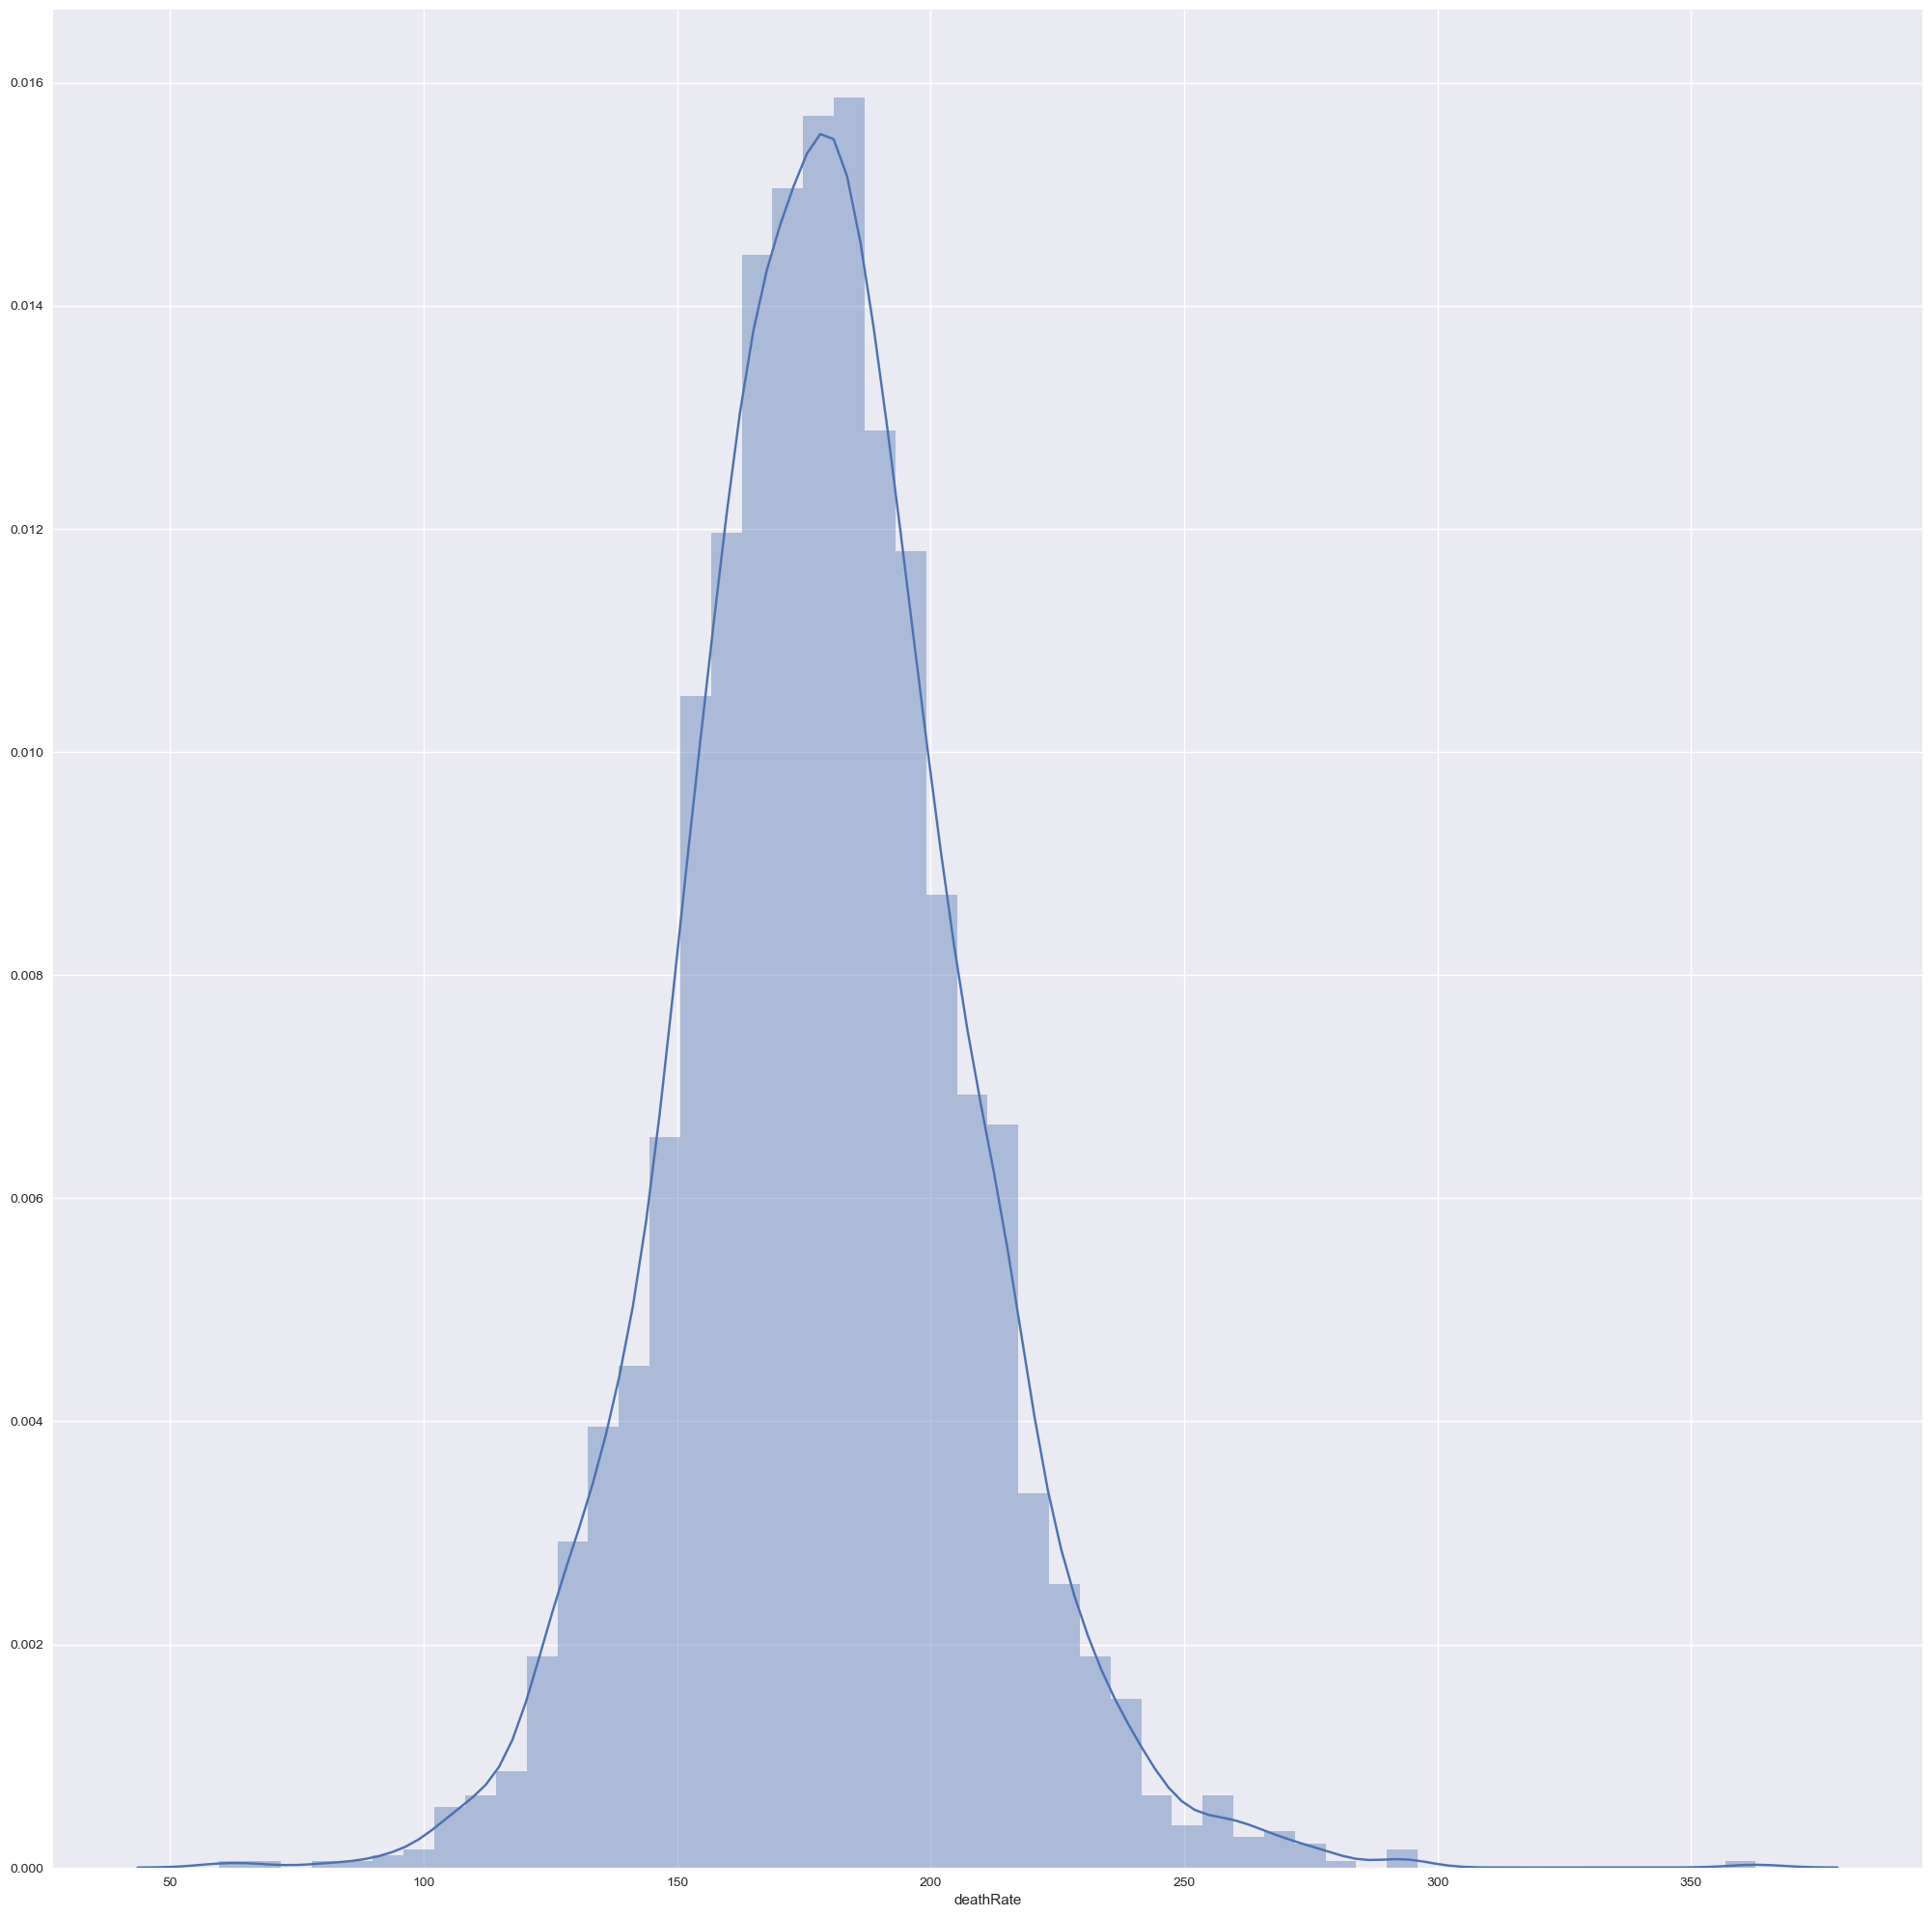

In [76]:
sns.distplot(Y)
plt.show()

In [77]:
for i in range(21):
    corr,_=pearsonr(X.iloc[:,i],Y)
    print(X.columns.values[i],corr)

avgAnnCount -0.143531619689
incidenceRate 0.449431697561
povertyPercent 0.429388980256
binnedInc -0.388214315227
PercentMarried -0.266820463554
PctHS18_24 0.261975940286
PctBachDeg18_24 -0.287817410167
PctHS25_Over 0.404589075781
PctBachDeg25_Over -0.485477318088
PctEmployed16_Over -0.397432540786
PctUnemployed16_Over 0.378412442139
PctPrivateCoverage -0.386065506754
PctPrivateCoverageAlone -0.32606720701
PctEmpPrivCoverage -0.26739942816
PctPublicCoverage 0.404571656293
PctPublicCoverageAlone 0.449357575785
PctWhite -0.177399980275
PctBlack 0.257023560464
PctAsian -0.186331104522
PctOtherRace -0.189893571076
PctMarriedHouseholds -0.29332534051


In [80]:
s=[]
for i in range(21):
    corr,_=pearsonr(X.iloc[:,i],Y)
    s.append(corr)
print(s)  

[-0.14353161968868808, 0.44943169756144569, 0.42938898025645067, -0.38821431522658589, -0.26682046355351141, 0.26197594028618731, -0.28781741016746598, 0.40458907578131914, -0.48547731808774469, -0.39743254078640977, 0.37841244213893926, -0.38606550675387441, -0.32606720701011582, -0.26739942816043777, 0.40457165629325997, 0.44935757578533264, -0.17739998027523518, 0.25702356046449165, -0.18633110452226684, -0.18989357107608779, -0.29332534051013265]


In [81]:
s.sort()
print(s)

[-0.48547731808774469, -0.39743254078640977, -0.38821431522658589, -0.38606550675387441, -0.32606720701011582, -0.29332534051013265, -0.28781741016746598, -0.26739942816043777, -0.26682046355351141, -0.18989357107608779, -0.18633110452226684, -0.17739998027523518, -0.14353161968868808, 0.25702356046449165, 0.26197594028618731, 0.37841244213893926, 0.40457165629325997, 0.40458907578131914, 0.42938898025645067, 0.44935757578533264, 0.44943169756144569]


In [82]:
#Model Building
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [83]:
X_train = np.append (arr=np.ones([X_train.shape[0],1]).astype(int), values = X_train, axis = 1)

In [96]:
import statsmodels.api as sm
X_opt = [0,1,2,3,5,6,8,9,10,14,15,16,17,18,20,21]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:              deathRate   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     135.2
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          4.73e-291
Time:                        17:40:16   Log-Likelihood:                -8940.3
No. Observations:                2031   AIC:                         1.791e+04
Df Residuals:                    2015   BIC:                         1.800e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.7931     15.540      9.575      0.0

In [ ]:
#From P-Value Test the following variables are eliminated
#medincome
#PctBachDeg18_24

In [ ]:
Index(['avgAnnCount', 'incidenceRate', 'povertyPercent',
       'PercentMarried', 'PctHS18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')